# Linear Regression Multivariate

### load boston house data

In [2]:
import pickle
import pandas as pd

with open('./boston_house.pkl', 'rb') as f:
    boston_house = pickle.load(f)

bh = pd.DataFrame(boston_house.data, columns = boston_house.feature_names)
bh['PRICE'] = boston_house.target

display(bh)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


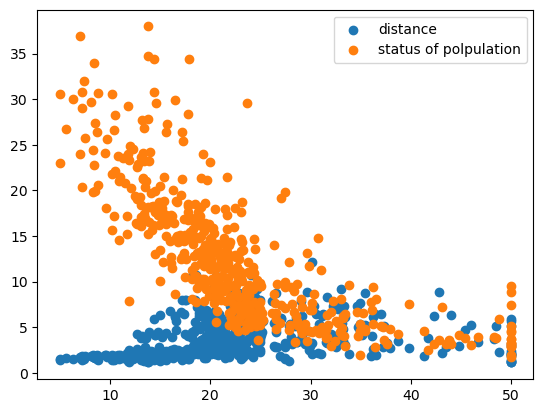

In [3]:
# check data set
import matplotlib.pyplot as plt

plt.scatter(bh['PRICE'], bh['DIS'], label = 'distance')
plt.scatter(bh['PRICE'], bh['LSTAT'], label = 'status of polpulation')
plt.legend()
plt.show()

### split dataset

In [4]:
# split data
from sklearn.model_selection import train_test_split

x = boston_house['data']
y = boston_house['target']

# IMPLEMENT HERE (random_state = 24)
# 데이터를 훈련용과 테스트용으로 분할 (80:20 비율)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)
# x_train, x_test, y_train, y_test =

### pre-processing (z-score normalization)

표준화 통계량:
X 평균: [ 3.24268188 11.95544554 11.1414604   0.07673267  0.5551651 ]...
X 표준편차: [ 7.07519936 24.01532092  6.90796743  0.26616681  0.1191761 ]...
Y 평균: 22.72

표준화 후 데이터 크기:
X_train: (404, 13), X_test: (102, 13)


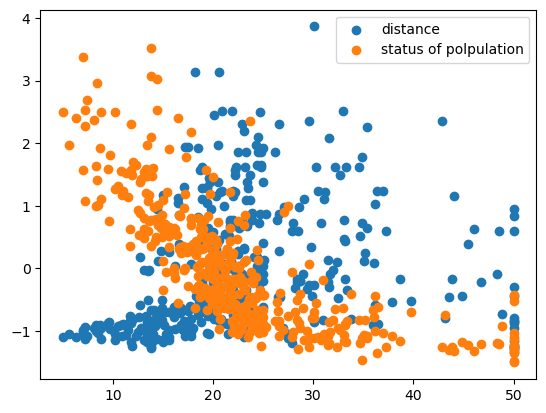

In [5]:
# standardization
import numpy as np

# IMPLEMENT HERE
# Z-score 정규화를 위한 통계량 계산 (훈련 데이터 기준)
x_offset = np.mean(x_train, axis=0)  # 각 특성의 평균
x_scale = np.std(x_train, axis=0)   # 각 특성의 표준편차
y_offset = np.mean(y_train)         # 타겟의 평균

# 훈련 데이터와 테스트 데이터를 표준화
xm_train = (x_train - x_offset) / x_scale
xm_test = (x_test - x_offset) / x_scale

print("표준화 통계량:")
print(f"X 평균: {x_offset[:5]}...")  # 처음 5개 특성만 출력
print(f"X 표준편차: {x_scale[:5]}...")
print(f"Y 평균: {y_offset:.2f}")

print(f"\n표준화 후 데이터 크기:")
print(f"X_train: {xm_train.shape}, X_test: {xm_test.shape}")

# show
bh = pd.DataFrame(xm_train, \
                  columns = boston_house.feature_names)
bh['PRICE']  = y_train
plt.scatter(bh['PRICE'], bh['DIS'], label = 'distance')
plt.scatter(bh['PRICE'], bh['LSTAT'], label = 'status of polpulation')
plt.legend()
plt.show()

### linear regression (using LinearRegression of scikit-learn )

MSE: 23.67


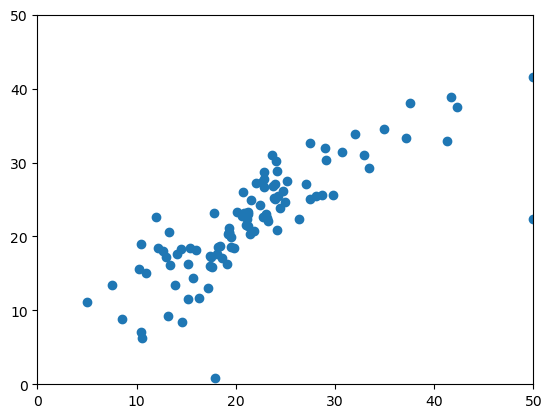

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# IMPLEMENT HERE (use LinearRegression)
# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(xm_train, y_train)

# 테스트 데이터로 예측
y_pred_test = model.predict(xm_test)

# IMPLEMENT HERE
# 테스트 데이터의 MSE 계산
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE: {mse_test:.2f}')

plt.scatter(y_test, y_pred_test)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()

### linear regression (using optimize of scikit-learn )

In [7]:
import numpy as np
from scipy.optimize import minimize

def linear_regression(params, X, y):
    W = params[:-1]  # 가중치 (계수)
    b = params[-1]   # 절편

    # IMPLEMENT HERE
    # 선형 회귀 예측값 계산: y_pred = X * W + b
    y_pred = np.dot(X, W) + b
    
    # 평균 제곱 오차 계산
    mse = np.mean((y - y_pred) ** 2)
    return mse

# IMPLEMENT HERE
# 초기 파라미터 설정 (가중치 + 절편)
# 특성 개수만큼의 가중치 + 1개의 절편
n_features = xm_train.shape[1]
initial_guess = np.zeros(n_features + 1)  # 모든 파라미터를 0으로 초기화

# 최적화 실행
result = minimize(linear_regression, initial_guess, args=(xm_train, y_train), method='BFGS')

print(result)

W_opt, b_opt = result.x[:-1], result.x[-1]

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 21.748722856941875
        x: [-3.950e-01  1.020e+00 ... -3.632e+00  2.272e+01]
      nit: 20
      jac: [-7.153e-07  4.768e-07 ... -3.576e-06  1.192e-06]
 hess_inv: [[ 1.018e+00 -7.520e-02 ... -1.886e-01  2.345e-03]
            [-7.520e-02  1.090e+00 ... -1.151e-01 -1.039e-02]
            ...
            [-1.886e-01 -1.151e-01 ...  1.198e+00  3.177e-02]
            [ 2.345e-03 -1.039e-02 ...  3.177e-02  5.098e-01]]
     nfev: 345
     njev: 23


MSE: 23.6745
RMSE: 4.8656
R² Score: 0.6505


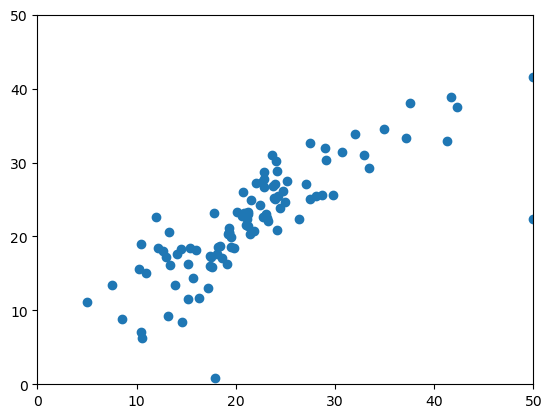

In [8]:
# Test data set
# IMPLEMENT HERE
# 최적화된 파라미터로 테스트 데이터 예측
y_pred_test = np.dot(xm_test, W_opt) + b_opt

# 테스트 데이터의 MSE 계산
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {np.sqrt(mse_test):.4f}')

# R² 점수 계산
ss_res = np.sum((y_test - y_pred_test) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2_score = 1 - (ss_res / ss_tot)
print(f'R² Score: {r2_score:.4f}')

# graph
plt.scatter(y_test, y_pred_test)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()